In [2]:
from IPython.display import SVG, display

import sys
# sys.path.append('..') # uncomments and adjust if your Boxes.py copy in not in the Python path
from boxes import *

SVG file saved successfully!


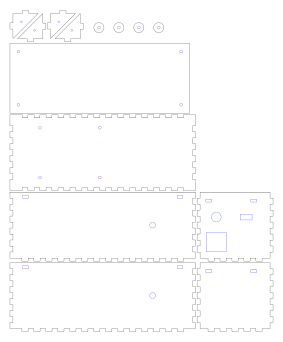

In [21]:
class ElectronicsWifiBox(Boxes):
    """Closed box with screw on top and mounting holes"""

    ui_group = "Box"

    def __init__(self) -> None:
        Boxes.__init__(self)
        self.addSettingsArgs(edges.FingerJointSettings)
        self.buildArgParser("x", "y", "h", "outside")
        self.argparser.add_argument(
            "--triangle", action="store", type=float, default=25.,
            help="Sides of the triangles holding the lid in mm")
        self.argparser.add_argument(
            "--d1", action="store", type=float, default=2.,
            help="Diameter of the inner lid screw holes in mm")
        self.argparser.add_argument(
            "--d2", action="store", type=float, default=3.,
            help="Diameter of the lid screw holes in mm")
        self.argparser.add_argument(
            "--d3", action="store", type=float, default=3.,
            help="Diameter of the mounting screw holes in mm")
        self.argparser.add_argument(
            "--outsidemounts", action="store", type=boolarg, default=True,
            help="Add external mounting points")
        self.argparser.add_argument(
            "--holedist", action="store", type=float, default=7.,
            help="Distance of the screw holes from the wall in mm")

    def wallxCB(self):
        t = self.thickness
        self.fingerHolesAt(0, self.h-1.5*t, self.triangle, 0)
        self.fingerHolesAt(self.x, self.h-1.5*t, self.triangle, 180)

        # Wifi antena holes
        self.hole(self.x - 40, self.h / 2, 3)

    def wallyCB(self, renderHole: bool = False):
        t = self.thickness
        self.fingerHolesAt(0, self.h-1.5*t, self.triangle, 0)
        self.fingerHolesAt(self.y, self.h-1.5*t, self.triangle, 180)
        if renderHole:
            # Ethernet hole
            self.rectangularHole(20, 20, 20, 20)
            # power button hole
            self.rectangularHole(50, 45, 12, 6)
            # charge hole
            self.hole(20, 45, 5)

    def bottomHoles(self):
        self.hole(30, 63, d=self.d3)
        self.hole(30, 13, d=self.d3)
        self.hole(90, 63, d=self.d3)
        self.hole(90, 13, d=self.d3)

    def render(self):

        t = self.thickness
        self.h = h = self.h + 2*t # compensate for lid
        x, y, h = self.x, self.y, self.h
        d1, d2, d3 =self.d1, self.d2, self.d3
        hd = self.holedist
        tr = self.triangle
        trh = tr / 3.

        if self.outside:
            self.x = x = self.adjustSize(x)
            self.y = y = self.adjustSize(y)
            self.h = h = h - 3*t

        self.rectangularWall(x, h, "fFeF", callback=[self.wallxCB],
                             move="right", label="")
        self.rectangularWall(y, h, "ffef", callback=[self.wallyCB(False)],
                             move="up", label="")
        self.rectangularWall(y, h, "ffef", callback=[self.wallyCB(True)],
                             label="")
        self.rectangularWall(x, h, "fFeF", callback=[self.wallxCB],
                             move="left up", label="")

        if not self.outsidemounts:
            self.rectangularWall(x, y, "FFFF", callback=[
            lambda:self.hole(hd, hd, d=d3)] *4, move="right",
            label="")
        else:
            self.flangedWall(x, y, edges="FFFF",
                             flanges=[0.0, 0, 0., 0], r=hd,
                             callback=[self.bottomHoles], move='up',
                    label="")
        self.rectangularWall(x, y, callback=[
            lambda:self.hole(trh, trh, d=d2)] * 4, move='up', label="")
        
        

        self.rectangularTriangle(tr, tr, "ffe", num=4,
            callback=[None, lambda: self.hole(trh, trh, d=d1)])
        
        self.circle(90, 15, 5)
        self.hole(90, 15, 1.5)

        self.circle(110, 15, 5)
        self.hole(110, 15, 1.5)

        self.circle(130, 15, 5)
        self.hole(130, 15, 1.5)

        self.circle(150, 15, 5)
        self.hole(150, 15, 1.5)


b = ElectronicsWifiBox()
b.parseArgs([
        '--reference=0',
        '--debug=0',
        '--x=180',
        '--y=70',
        '--h=60',
        '--d3=3',
        '--outside=false',
        '--thickness=3',
        
    ])
b.open()
b.render()
data = b.close()

# Convert data to string
svg_data = data.getvalue()

# Save SVG data to a file
with open('rock64-wifi-box.svg', 'w') as svg_file:
    svg_file.write(svg_data.decode('utf-8'))

print("SVG file saved successfully!")

display(SVG(data=svg_data))